<a href="https://colab.research.google.com/github/prasa12/MyPython-Stuff/blob/master/Pytorch/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with Pytorch.




In [2]:
import sklearn

from sklearn.datasets import make_circles

n_samples  = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X: \n{X[:5]} \n")
print(f"First 5 samples of y: \n{y[:5]} \n")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] 

First 5 samples of y: 
[1 1 1 1 0] 



In [4]:
y


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
import pandas as pd
circles = pd.DataFrame({'X1':X[:, 0], 'X2':X[:, 1], 'label':y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


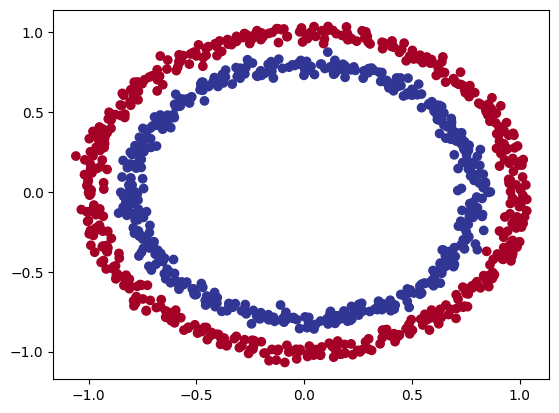

In [6]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [7]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"Sample point input features: \n{X_sample} \n")
print(f"Sample point label: \n{y_sample} \n")

Sample point input features: 
[0.75424625 0.23148074] 

Sample point label: 
1 



In [10]:
### 1.2 Turn data into tensors and create train and test splits
import torch
torch.__version__

'2.8.0+cu126'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [13]:
type(X), torch.float32, torch.device('cpu')

(numpy.ndarray, torch.float32, device(type='cpu'))

In [14]:
# Split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

## 2. Building a model

Build a model to classify red and blue dots
1. Set up device egnostic code so our code will run in cpu and gpu
2. Construct  a model ( by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
# import Pytorch and run
import torch
from torch import nn

# Make device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [18]:
X_train.shape
y_train[:5]

array([1, 0, 0, 0, 1])

In [19]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.1921,  0.0718],
        [-0.3284,  0.4679],
        [ 0.2467,  0.4284],
        [ 0.1321, -0.1950],
        [ 0.2384, -0.1872]], requires_grad=True)

In [21]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1),
).to(device)

model_0


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [22]:
device
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4598, -0.4221],
                      [ 0.3147,  0.1132],
                      [ 0.1174,  0.5596],
                      [-0.0673, -0.4308],
                      [-0.4505, -0.2569],
                      [ 0.2067,  0.4128],
                      [-0.5230,  0.5688],
                      [ 0.0371, -0.2540]])),
             ('0.bias',
              tensor([ 0.2482, -0.5373,  0.1964,  0.6570,  0.1969,  0.5747,  0.0398, -0.3067])),
             ('1.weight',
              tensor([[-0.2907,  0.3398,  0.0526, -0.3380, -0.0958,  0.2674,  0.1613, -0.0303]])),
             ('1.bias', tensor([-0.1526]))])

In [23]:
# Make predictions with the model
untrained_preds = model_0(torch.from_numpy(X_test).type(torch.float32).to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: (200,)

First 10 predictions:
tensor([[-0.1850],
        [ 0.0836],
        [-0.8467],
        [ 0.0024],
        [-0.7793],
        [-0.6159],
        [ 0.0871],
        [-0.0765],
        [-0.8485],
        [ 0.1024]], grad_fn=<SliceBackward0>)

First 10 test labels:
[1 0 1 0 1 1 0 0 1 0]


In [24]:
X_test[:10], y_test[:10]

(array([[-0.37519302,  0.68265972],
        [ 0.01538035,  0.96002602],
        [-0.7027836 , -0.31471699],
        [-0.28525015,  0.96637754],
        [ 0.40241682, -0.74375355],
        [ 0.63227933, -0.57110803],
        [ 0.85606699,  0.54994305],
        [ 1.00335945,  0.19028381],
        [-0.74891503, -0.2951126 ],
        [ 0.0537797 ,  0.97388312]]),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

### 2.1 Setup loss function and optimizer
Which loss function or optimiser should you use?

Again ... this is problem specific.

For example for regression you need MAE or nn.MSELoss

For classification, you may want nn.BCELoss or nn.BCEWithLogitsLoss

In [25]:
# Set up loss function
loss_fn = nn.BCEWithLogitsLoss()

# Set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4598, -0.4221],
                      [ 0.3147,  0.1132],
                      [ 0.1174,  0.5596],
                      [-0.0673, -0.4308],
                      [-0.4505, -0.2569],
                      [ 0.2067,  0.4128],
                      [-0.5230,  0.5688],
                      [ 0.0371, -0.2540]])),
             ('0.bias',
              tensor([ 0.2482, -0.5373,  0.1964,  0.6570,  0.1969,  0.5747,  0.0398, -0.3067])),
             ('1.weight',
              tensor([[-0.2907,  0.3398,  0.0526, -0.3380, -0.0958,  0.2674,  0.1613, -0.0303]])),
             ('1.bias', tensor([-0.1526]))])

In [26]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


## 3. Training the model

To train the model we need to run the training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. optimizer step


### 3.1 Going from raw logits -> prediction probabilities -> prediction labesl

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities by passing them to some kind of activation function(e.g. sigmoid for binary classification and softmax for multiclass classification)

THen we can convert our model's prediction probabilities to prediction labels by either rounding them of taking the argmax()

In [27]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(torch.from_numpy(X_test).type(torch.float32).to(device))
y_logits[:5]

tensor([[-0.1850],
        [ 0.0836],
        [-0.8467],
        [ 0.0024],
        [-0.7793]])

In [28]:
y_test[:5]

array([1, 0, 1, 0, 1])

In [29]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)

# View first 5 predictions
y_pred_probs[:5]
#
torch.round(y_pred_probs[:5])


tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])

For Prediction probability values, we need to perform a range-style rounding on them:
* y_pred_probs >=0.5, y = 1 ( class 1)
* y_pred_probs <0.5 , y = 0 (class 0)

In [30]:
y_pred = torch.round(y_pred_probs)
y_pred[:5]
# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(torch.from_numpy(X_test).type(torch.float32).to(device))))
y_pred_labels[:5]
# Check for equality
print(torch.eq(y_pred_labels.squeeze(), y_pred.squeeze()))
print(f"\nNumber of equal predictions: {torch.eq(y_pred_labels, y_pred).sum()}")
y_pred.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 1.])

In [31]:
### Building Traing and Testing Loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
# Convert NumPy arrays to PyTorch tensors and then move to device
X_train, y_train = torch.from_numpy(X_train).type(torch.float32).to(device), torch.from_numpy(y_train).type(torch.float32).to(device)
X_test, y_test = torch.from_numpy(X_test).type(torch.float32).to(device), torch.from_numpy(y_test).type(torch.float32).to(device)


# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs ->pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train) # nn.BCEwithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73700, Accuracy: 43.38% | Test loss: 0.74762, Test acc: 46.50%
Epoch: 10 | Loss: 0.71150, Accuracy: 48.38% | Test loss: 0.72444, Test acc: 46.50%
Epoch: 20 | Loss: 0.70295, Accuracy: 49.75% | Test loss: 0.71546, Test acc: 46.00%
Epoch: 30 | Loss: 0.69935, Accuracy: 50.75% | Test loss: 0.71078, Test acc: 46.00%
Epoch: 40 | Loss: 0.69745, Accuracy: 51.12% | Test loss: 0.70771, Test acc: 46.00%
Epoch: 50 | Loss: 0.69626, Accuracy: 51.12% | Test loss: 0.70543, Test acc: 46.00%
Epoch: 60 | Loss: 0.69543, Accuracy: 51.00% | Test loss: 0.70365, Test acc: 45.50%
Epoch: 70 | Loss: 0.69483, Accuracy: 51.50% | Test loss: 0.70222, Test acc: 45.50%
Epoch: 80 | Loss: 0.69439, Accuracy: 51.38% | Test loss: 0.70105, Test acc: 46.00%
Epoch: 90 | Loss: 0.69405, Accuracy: 51.62% | Test loss: 0.70008, Test acc: 45.00%


### 4. Make predictions and evaluate the model

From the metrics it looks like our model is not learning anythins

So to inspect it let's make some predictions and make them visual

In other words, " Visualize, Visualize, Visualize"

In [32]:
import requests

from pathlib import Path

# Download the helper functions from Learn Pytorch repo(if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



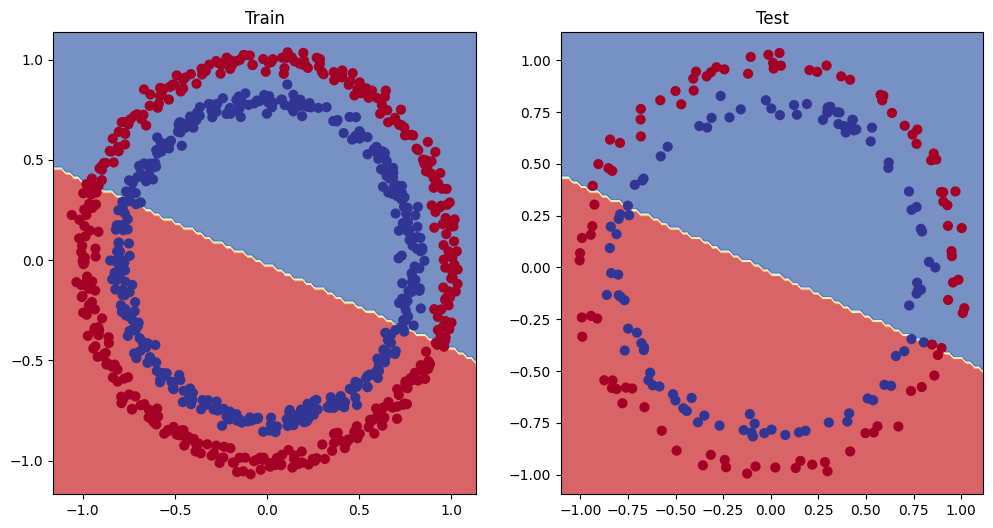

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5.Improving the model  

*   Add More layers - give the model more chances to learn about patterns in the data
*   Add more hidden units - go from 5 hidden units to 10 hidden units
*   Fit for longer
*   Changing the Activation functions
*   Changing the learning rate
*   Change the loss function

These options are all from a models perspective, they deal directly deal with model, rather than data

And because these options are all values we can change, they are referred as hyper parameters.

Let's try and improve our model by

* Adding more hidden units: 5->10
* Increase the number of layers : 2->3
* Increase the number of epochs: 100 ->1000



In [34]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4397, -0.3738],
                      [ 0.2882,  0.0490],
                      [ 0.1171,  0.5595],
                      [-0.0457, -0.3789],
                      [-0.4489, -0.2537],
                      [ 0.1757,  0.3371],
                      [-0.5366,  0.5358],
                      [ 0.0415, -0.2431]])),
             ('0.bias',
              tensor([ 0.2068, -0.4876,  0.2023,  0.6117,  0.1876,  0.6256,  0.0655, -0.3142])),
             ('1.weight',
              tensor([[-0.0979,  0.1963, -0.0722, -0.1146,  0.0532,  0.2529,  0.0822, -0.0235]])),
             ('1.bias', tensor([0.0236]))])

In [35]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=128)
    self.layer_2 = nn.Linear(in_features=128, out_features=128)
    self.layer_3 = nn.Linear(in_features=128, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
)

In [36]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)


In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs ->pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train) # nn.BCEwithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69318, Accuracy: 50.50% | Test loss: 0.69156, Test acc: 51.50%
Epoch: 100 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69469, Test acc: 45.50%
Epoch: 200 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69470, Test acc: 46.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


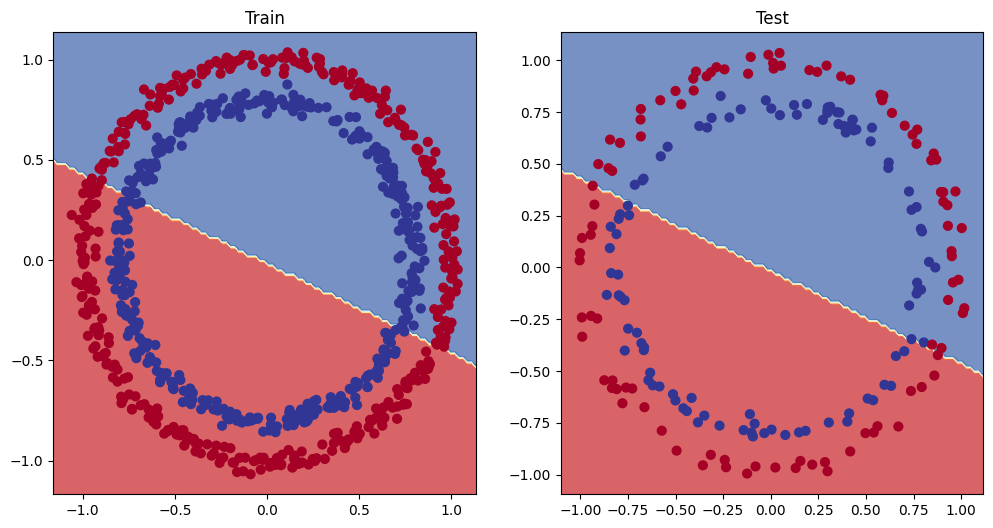

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
#

### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem

In [39]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create Data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8 * len(X_regression))
X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg, y_test_reg = X_regression[train_split:], y_regression[train_split:]

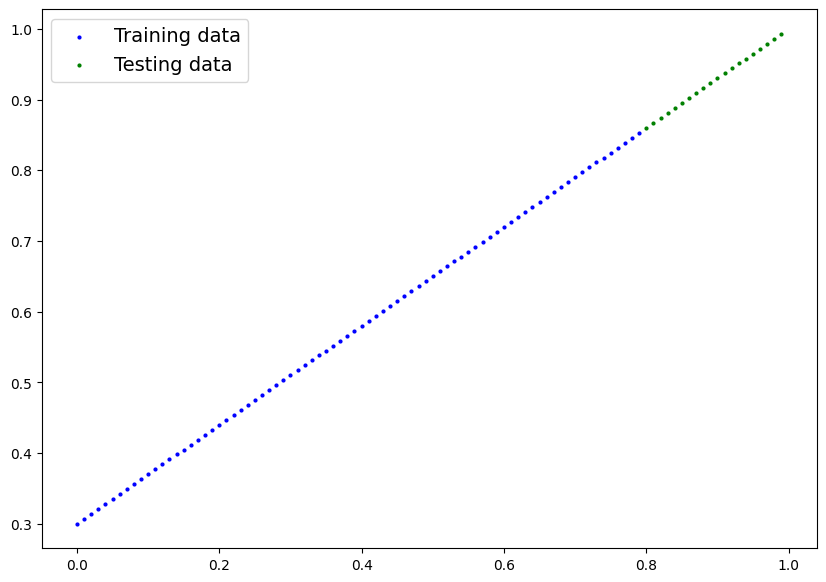

In [40]:
plot_predictions(train_data=X_train_reg,
                 train_labels = y_train_reg,
                 test_data = X_test_reg,
                 test_labels = y_test_reg)

In [41]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
)

In [42]:
### 5.2 Adjust model_1 to fit a straight line
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
## Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [44]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000
for epoch in range(epochs):
  ### Training
  model_2.train()

  # Forward pass
  y_train = model_2(X_train_reg)
  loss = loss_fn(y_train, y_train_reg)

  # Calculate the loss
  loss = loss_fn(y_train, y_train_reg)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test loss: 0.94965
Epoch: 100 | Loss: 0.40272 | Test loss: 0.54029
Epoch: 200 | Loss: 0.05876 | Test loss: 0.13480
Epoch: 300 | Loss: 0.01461 | Test loss: 0.03342
Epoch: 400 | Loss: 0.00308 | Test loss: 0.00008
Epoch: 500 | Loss: 0.00309 | Test loss: 0.00012
Epoch: 600 | Loss: 0.00309 | Test loss: 0.00018
Epoch: 700 | Loss: 0.00299 | Test loss: 0.00011
Epoch: 800 | Loss: 0.00299 | Test loss: 0.00016
Epoch: 900 | Loss: 0.00289 | Test loss: 0.00011


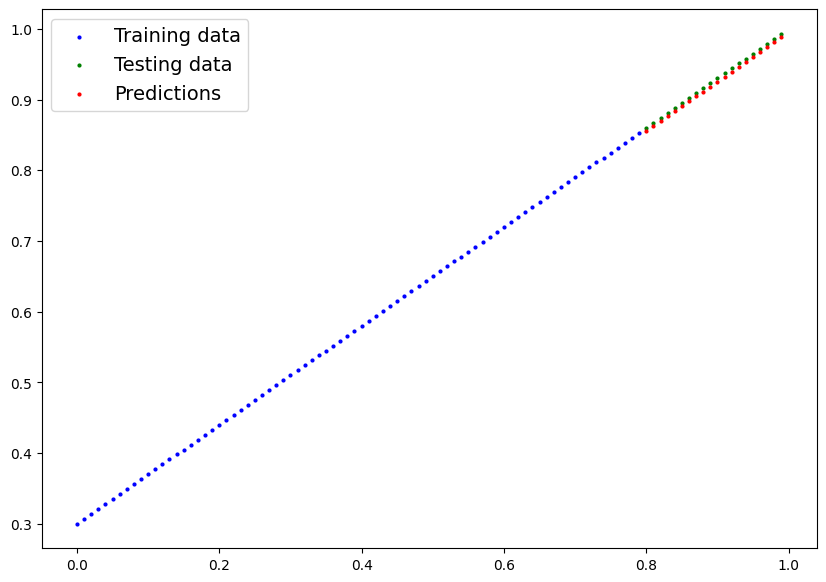

In [45]:
model_2.eval()
with torch.inference_mode():
  test_pred = model_2(X_test_reg)
plot_predictions(train_data=X_train_reg,
                 train_labels = y_train_reg,
                 test_data = X_test_reg,
                 test_labels = y_test_reg,
                 predictions = test_pred)

Building a model with Non Linearity

In [46]:
# Build a model with Non linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=100)
    self.layer_2 = nn.Linear(in_features=100, out_features=100)
    self.layer_3 = nn.Linear(in_features=100, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

Training Model with Non Linearity

In [48]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on the target device
# Revert to using the original circle data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train, y_train = torch.from_numpy(X_train).type(torch.float32).to(device), torch.from_numpy(y_train).type(torch.float32).to(device)
X_test, y_test = torch.from_numpy(X_test).type(torch.float32).to(device), torch.from_numpy(y_test).type(torch.float32).to(device)

# Set the number of epochs
epochs = 10000

# Move model to device
model_3.to(device)

for epoch in range(epochs):
  ### Training
  model_3.train()

  #1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3. Optimizer grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69218, Accuracy: 50.38% | Test loss: 0.69594, Test acc: 51.00%
Epoch: 100 | Loss: 0.69038, Accuracy: 52.88% | Test loss: 0.69428, Test acc: 52.00%
Epoch: 200 | Loss: 0.68885, Accuracy: 53.75% | Test loss: 0.69295, Test acc: 50.00%
Epoch: 300 | Loss: 0.68732, Accuracy: 54.75% | Test loss: 0.69164, Test acc: 50.00%
Epoch: 400 | Loss: 0.68584, Accuracy: 54.75% | Test loss: 0.69038, Test acc: 50.50%
Epoch: 500 | Loss: 0.68439, Accuracy: 55.25% | Test loss: 0.68916, Test acc: 52.00%
Epoch: 600 | Loss: 0.68295, Accuracy: 56.25% | Test loss: 0.68793, Test acc: 52.00%
Epoch: 700 | Loss: 0.68148, Accuracy: 57.50% | Test loss: 0.68665, Test acc: 52.50%
Epoch: 800 | Loss: 0.67993, Accuracy: 58.25% | Test loss: 0.68530, Test acc: 53.50%
Epoch: 900 | Loss: 0.67830, Accuracy: 60.25% | Test loss: 0.68386, Test acc: 56.50%
Epoch: 1000 | Loss: 0.67656, Accuracy: 62.12% | Test loss: 0.68231, Test acc: 56.50%
Epoch: 1100 | Loss: 0.67471, Accuracy: 64.00% | Test loss: 0.68061, Test acc:

In [49]:
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

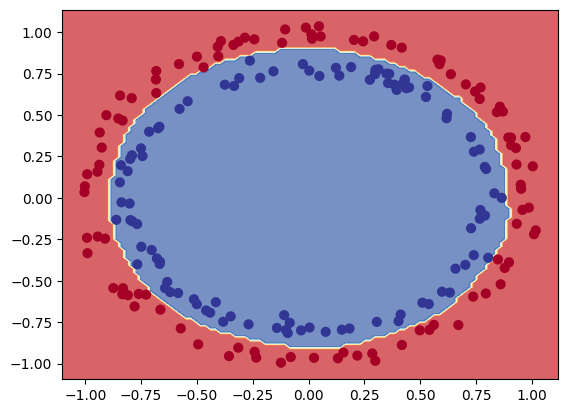

In [50]:
plot_decision_boundary(model_3, X_test, y_test)
#

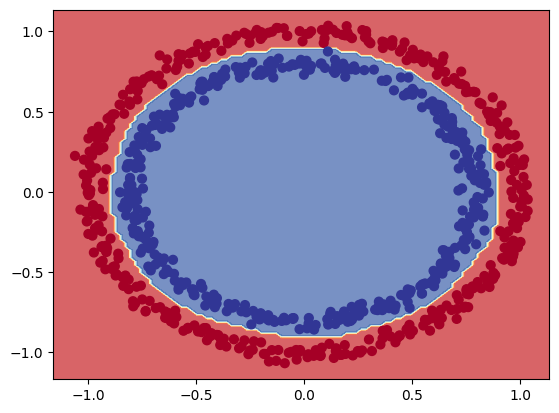

In [51]:
plot_decision_boundary(model_3, X_train, y_train)
#

##7. Replicating Non Linear Activation functions

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non linear functions

In [52]:
# Create a tensor to start with
A = torch.arange(-10,10,1, dtype= torch.float32)
A.dtype

torch.float32

In [53]:
A


tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

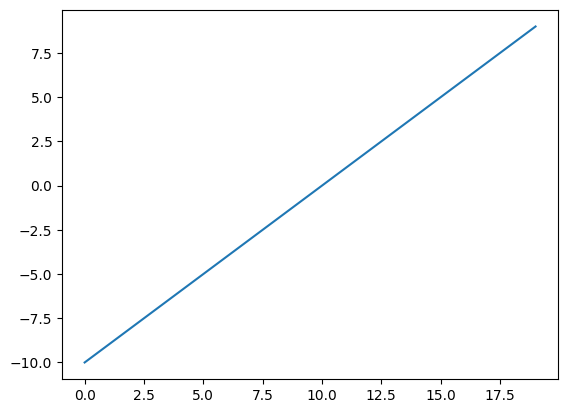

In [54]:
plt.plot(A)

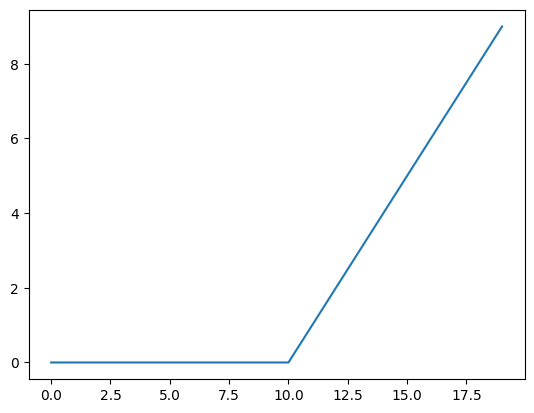

In [55]:
plt.plot(torch.relu(A))

In [56]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

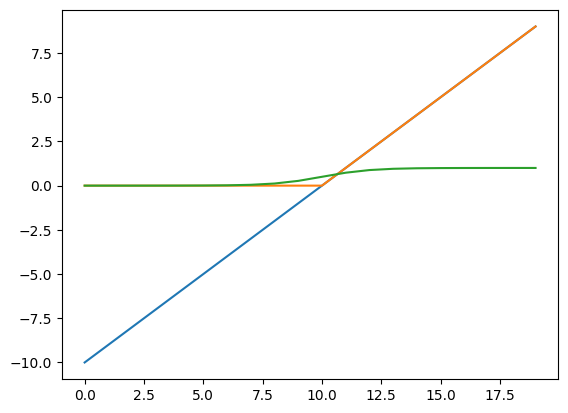

In [57]:
# Plot ReLU activation functions
plt.plot(A)
plt.plot(relu(A))
plt.plot(torch.sigmoid(A))

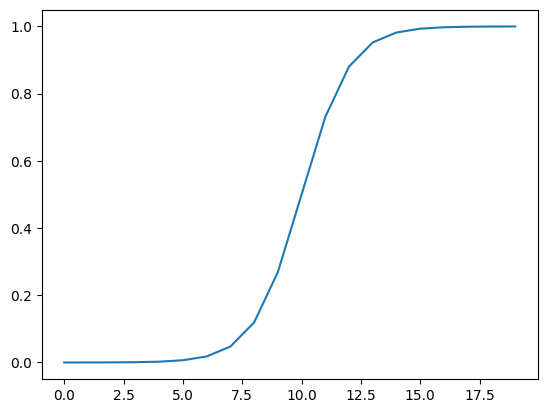

In [58]:
def sigmoid(x):
  return 1/(1+ torch.exp(-x))

plt.plot(sigmoid(A))

## 8. Putting all together with a multi-class classification problem

* Binary Classification = one thing or another ( cat vs dog, spam vs not spam, fraud vs not fraud)


##8.1 Creating a toy multi class dataset

In [59]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [60]:
# Set hyper parameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,                           cluster_std=1.5,
                           random_state=RANDOM_SEED)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

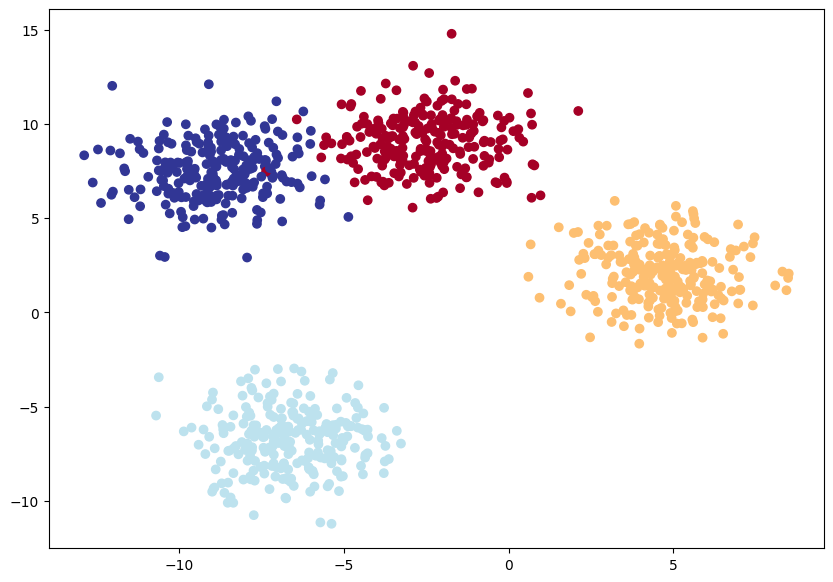

In [61]:
# Plot the data ( Visualize)
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

# 8.2 Building a multi class classification model

In [62]:
# Create  a device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [63]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features))

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [64]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [65]:
### 8.3 Create a loss functions and an optimizer for blob model

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01)


In [66]:
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_pred_labels = torch.argmax(y_pred_probs, dim=1)


y_pred_labels[1:10]
y_blob_test[1:10]

tensor([3, 2, 1, 0, 3, 2, 0, 2, 0])

In [67]:
# Fit the multi-class model to data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_blob_train.long()) # Cast target to LongTensor
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test.long()) # Cast target to LongTensor
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883, Accuracy: 40.38% | Test loss: 1.14724, Test acc: 38.50%
Epoch: 100 | Loss: 0.64382, Accuracy: 96.88% | Test loss: 0.68117, Test acc: 97.00%
Epoch: 200 | Loss: 0.41891, Accuracy: 98.62% | Test loss: 0.44228, Test acc: 100.00%
Epoch: 300 | Loss: 0.23740, Accuracy: 99.25% | Test loss: 0.24455, Test acc: 99.50%
Epoch: 400 | Loss: 0.10433, Accuracy: 99.25% | Test loss: 0.10148, Test acc: 99.50%
Epoch: 500 | Loss: 0.06482, Accuracy: 99.25% | Test loss: 0.05914, Test acc: 99.50%
Epoch: 600 | Loss: 0.05031, Accuracy: 99.25% | Test loss: 0.04355, Test acc: 99.50%
Epoch: 700 | Loss: 0.04289, Accuracy: 99.25% | Test loss: 0.03538, Test acc: 99.50%
Epoch: 800 | Loss: 0.03833, Accuracy: 99.25% | Test loss: 0.03022, Test acc: 99.50%
Epoch: 900 | Loss: 0.03527, Accuracy: 99.25% | Test loss: 0.02690, Test acc: 99.50%


In [68]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_logits[:10]

tensor([[-0.6780,  5.9374, -7.5888, -8.3576],
        [-2.1662, -6.3420, -3.7323,  3.1174],
        [-3.4562, -3.9502,  3.1581, -2.6437],
        [-1.1644,  4.1617, -3.8413, -4.8268],
        [ 3.7170, -1.3749, -9.0873, -6.8768],
        [-2.8119, -7.5421, -4.3044,  3.7828],
        [-3.0704, -3.3803,  2.7892, -2.1602],
        [ 3.3590, -4.0543, -6.8652, -3.5161],
        [-4.4254, -5.0603,  3.8233, -3.4248],
        [ 3.4808, -3.0514, -7.4990, -4.6582]])

In [69]:
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [70]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

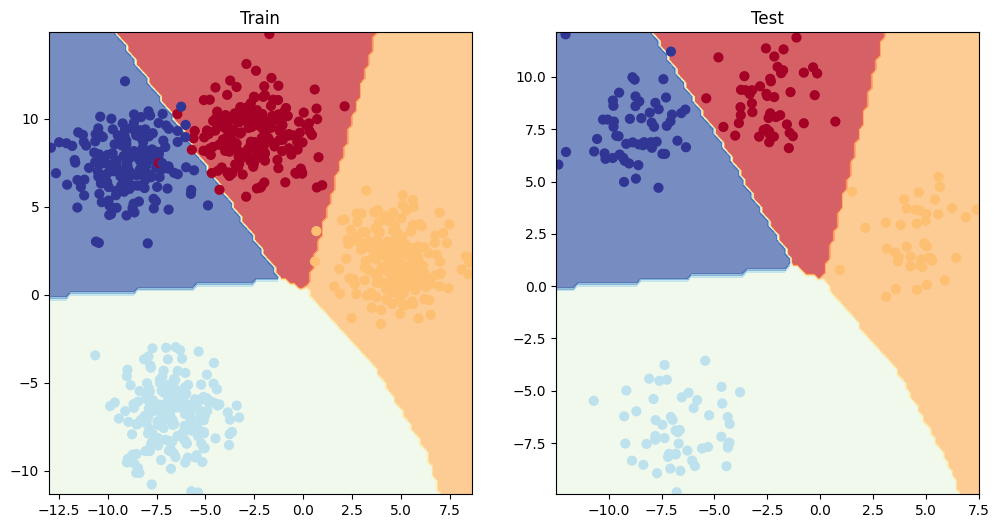

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
#

### 8.6 Making and evaluating predictions with a Pytorch multi-class model

In [72]:
# Make Predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_pred_labels = torch.argmax(y_pred_probs, dim=1)
  print(f"Predictions: {y_pred_labels}")
  print(f"Actual labels: {y_blob_test}")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])
Actual labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 

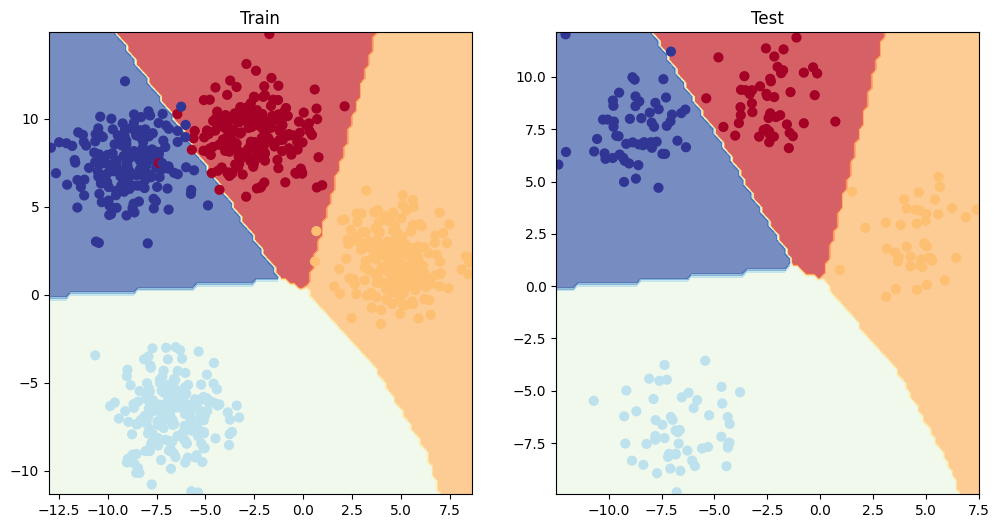

In [74]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics ... (to evaluate our classification model)
* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1- score
* Confusion matrix
* Classification report